In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

from re import sub
from decimal import Decimal
import datetime


In [2]:
data = pd.read_csv("data_ce.csv") 
data.head()
print(data['price'])

0         59.0
1        216.0
2        125.0
3        141.0
4         75.0
         ...  
16346     62.0
16347     76.0
16348     60.0
16349    156.0
16350    170.0
Name: price, Length: 16351, dtype: float64


In [3]:
data.head()
data.drop('Unnamed: 0', axis=1, inplace=True)



In [4]:
data.drop('host_name', axis=1, inplace=True)

In [5]:
display(list(data.columns.values)) 

['description',
 'neighborhood_overview',
 'host_about',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'property_type_0',
 'property_type_1',
 'property_type_2',
 'property_type_3',
 'property_type_4',
 'property_type_5',
 'property_type_6',
 'property_type_7',
 'property_type_8',
 'property_type_9',
 'property_type_10',
 'property_type_11',
 'property_type_12',
 'property_type_13',
 'property_type_14',
 'property_type_15',
 'property_type_16',
 'property_type_17',
 'property_type_18',
 'property_type_19',
 'property_type_20',
 'property_type_21',
 'property_type_22',
 'property_type_23',
 'property_type_24',
 'property_type_25',
 'property_type_26',
 'property_type_27',
 'property_type_28',
 'property_type_29',
 'property_type_30',
 'property_type_31',
 'property_type_32',
 'property_type_33',
 'property_type_34',
 'property_type_35',
 'property_type_36',
 'pr

In [7]:
data.drop(['host_total_listings_count', 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [8]:
data.head()

,description,neighborhood_overview,host_about,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_has_profile_pic,host_identity_verified,property_type_0,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_derived,calendar_last_scraped_derived,first_review_derived,last_review_derived,host_location_derived,distancefromberlin
0,1,1,1,1,1,1,1,1,1,-0.983871,...,0,1,0,1.99,4461.573215,92.573215,4274.573215,301.573217,1,573.58
1,1,1,1,0,1,1,2,1,1,0.016129,...,1,2,0,2.65,4027.573215,93.573215,3937.573215,246.573217,1,576.82
2,1,0,1,1,1,1,2,1,0,0.016129,...,1,0,0,0.16,4039.573215,93.573215,1055.573215,306.573217,0,577.43
3,1,1,1,1,1,1,1,1,1,0.016129,...,0,1,0,2.07,3916.573215,92.573215,3259.573215,139.573217,1,576.72
4,1,1,1,1,1,1,2,1,1,-0.983871,...,0,2,0,2.73,3865.573215,92.573215,3764.573215,117.573217,1,576.98


In [9]:
from sklearn import preprocessing
#print(features)
#Separating out the features
X = data.loc[:,data.columns!='price'].values
#Separating out the target
y = data.loc[:,['price']].values
#Standardizing the features
x = preprocessing.normalize(X)

In [10]:
print(y)

[[ 59.]
 [216.]
 [125.]
 ...
 [ 60.]
 [156.]
 [170.]]


In [11]:
# Split the dataset into the training set and test set
# We're splitting the data in 1/3, so out of 30 rows, 20 rows will go into the training set,
# and 10 rows will go into the testing set.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [12]:
#Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(xTrain, yTrain)  

C:\Users\manju\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [13]:
yPred = regressor.predict(xTest)

In [14]:
print(yPred)
print(yTest)

[ 59.96616667 127.54096667 185.4591     ...  89.28406667 149.64323333
 231.88673333]
[[ 42.  ]
 [180.57]
 [235.  ]
 ...
 [ 55.  ]
 [175.  ]
 [339.  ]]


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Squared Error",mean_squared_error(yPred, yTest))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(yPred, yTest)))
print("Mean Absolute Error", mean_absolute_error(yPred, yTest))

Mean Squared Error 73556.46216906716
Root Mean Squared Error 271.21294616789066
Mean Absolute Error 56.983045074298296


In [17]:
print('R^2 Training Score: {:.2f}\nR^2 Validation Score: {:.2f}'.format(regressor.score(xTrain, yTrain), 
                                                                                             
                                                                                        regressor.score(xTest, yTest)))

R^2 Training Score: 0.96
R^2 Validation Score: 0.70


In [18]:
regressor.feature_importances_

array([1.36611697e-03, 5.33012657e-04, 5.13588362e-04, 1.02861305e-03,
       2.67345805e-03, 2.85027442e-03, 1.33840907e-02, 2.48123764e-03,
       1.95221900e-03, 3.57633204e-04, 3.64716677e-04, 2.51352244e-04,
       7.59912657e-04, 1.59992490e-04, 2.53317339e-04, 6.57526996e-03,
       8.89087090e-03, 2.71385635e-03, 9.26383783e-03, 8.48831269e-03,
       5.29254653e-04, 5.12717236e-03, 7.64798644e-03, 1.40702036e-02,
       4.06522213e-04, 3.34173058e-04, 1.74937387e-04, 3.40686245e-03,
       1.08323356e-03, 5.58580530e-04, 1.91048251e-04, 5.79603333e-04,
       1.35013973e-04, 3.60647037e-04, 2.70592375e-04, 4.51266884e-04,
       1.16110377e-03, 9.27352648e-04, 1.67183110e-04, 3.59826194e-04,
       3.14714123e-03, 9.09058347e-04, 2.16219771e-03, 3.83881096e-04,
       3.91820981e-04, 3.21211486e-03, 2.02445625e-03, 1.82841442e-03,
       8.78600212e-04, 3.58660003e-03, 1.05595164e-04, 1.42735407e-03,
       3.25392359e-03, 2.75622445e-03, 3.55849097e-03, 1.70303710e-03,
      

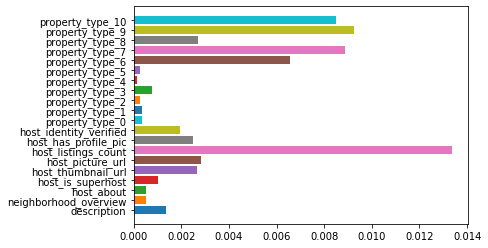

In [19]:
data_ex= data.loc[:,data.columns!='price'].copy()
names_index = np.array(data_ex.columns.values.tolist())
#print(names_index.shape)
#print(regressor.feature_importances_.shape)
for i in range (0,20):
    plt.barh(names_index[i], regressor.feature_importances_[i])



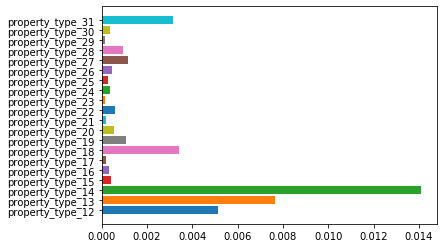

In [20]:
for i in range (21,41):
    plt.barh(names_index[i], regressor.feature_importances_[i])

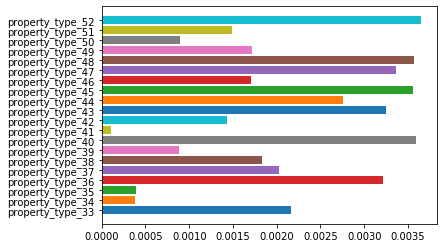

In [21]:
for i in range (42,62):
    plt.barh(names_index[i], regressor.feature_importances_[i])

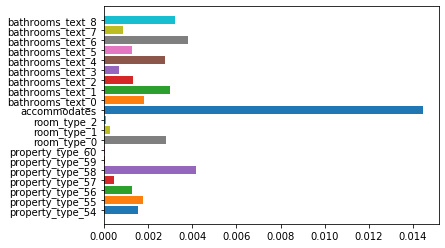

In [22]:
for i in range (63,83):
    plt.barh(names_index[i], regressor.feature_importances_[i])

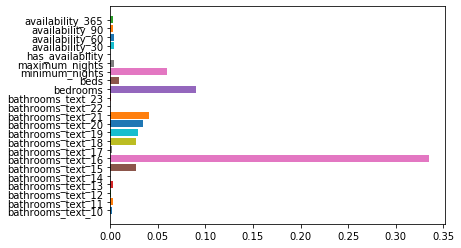

In [27]:
for i in range (84,107):
    plt.barh(names_index[i], regressor.feature_importances_[i])

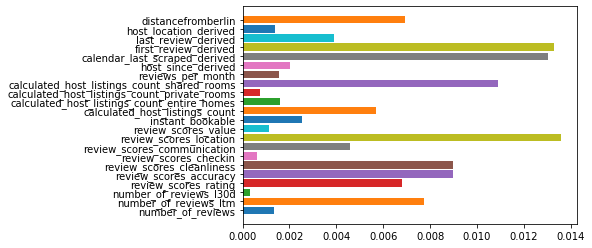

In [28]:
for i in range (107,129):
    plt.barh(names_index[i], regressor.feature_importances_[i])

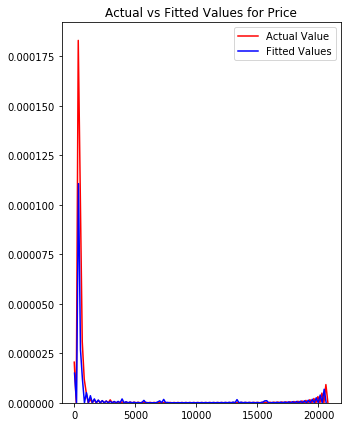

In [29]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(yTest, hist=False, color="r", label="Actual Value")
sns.distplot(yPred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [30]:
import numpy as np
yTest = np.array(list(yTest))
yPred = np.array(yPred)
print('Sample predictions are:\n',yPred[:5].flatten())
yPred_a = pd.DataFrame(yPred)
yTest=pd.DataFrame(yTest)


Sample predictions are:
 [ 59.96616667 127.54096667 185.4591      79.1077     126.0505    ]


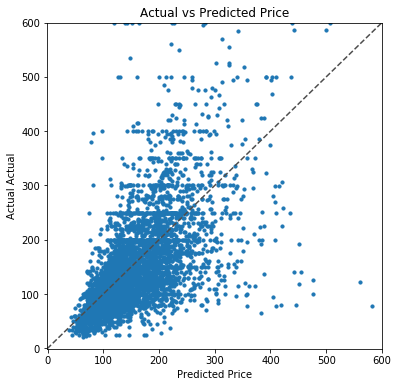

In [31]:
#yTest_a = yTest.reset_index(drop=True, inplace = False)
pred_act_df = pd.concat([yTest, yPred_a], axis =1).sort_values(1, axis=1).reset_index(drop = True)

plt.figure(figsize=(6,6))
maxlimit = pred_act_df.iloc[:,1].max()
plt.xlim(-1, 600)
plt.ylim(-1,600)
plt.scatter(pred_act_df.iloc[:,0], pred_act_df.iloc[:,1], s=10)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Actual')
plt.plot([-1,maxlimit], [-1,maxlimit], ls="--", c=".3")
plt.title('Actual vs Predicted Price')
plt.show()

               0
0     -17.966167
1     120.603833
2     175.033833
3      15.033833
4      40.033833
...          ...
5446  120.033833
5447   -2.966167
5448   -4.966167
5449  115.033833
5450  279.033833

[5451 rows x 1 columns]


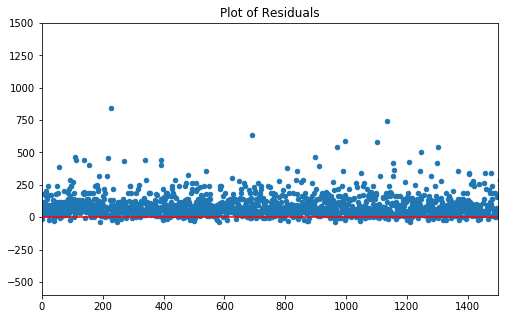

In [32]:
from scipy import stats
#calculating losses
residuals=yTest-yPred[0]
print(residuals)

#Plotting
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.xlim(-1, 1500)
plt.ylim(-600,1500)
plt.axhline(0, color="red")
plt.title('Plot of Residuals')
plt.scatter(residuals.index,residuals, s=20)

